IMPORTACIÓN DE LIBRERIAS

# META DATA

**1.- Descripción de los datos**

Se trata de un dataset basado en las ventas de 4 franquicias de Starbuck, en el cual se tiene registradas las ventas de 3 meses del año 2025.

Se quiere conocer estadisticamente la respuesta a varias preguntas para subir el rendimiento económico y de satisfacción al cliente en dichas sucursales.






**2.- Diccionario de datos**

*   **ID_Venta:** identificador de la venta
*   **Fecha:** Fecha de la venta
*   **Hora:** Hora de la venta
*   **Sucursal:** Sucursal donde hubo la venta
*   **Nombre_Producto:** Que producto se vendio
*   **Categoría_Producto:** Se ivide en 11 categorías
    - *Té Caliente*
    - *Té*
    - *Bakery*
    - *Bebida Espresso Caliente*
    - *Café en Granos*
    - *Frappuccino*
    - *Bebida Espresso Helada*
    - *Snacks*
    - *Merchandising*
    - *Sándwiches*
    - *Té Helado*
*   **Tamaño:** Dividido en 4 categorías
    - *Tall*
    - *Pequeño*
    - *Grande*
    - *Venti*
*   **Cantidad:** cantidad de productos comprados
*   **Precio_Unitario:** Precio por producto
*   **Total_Venta:** Precio total de la compra
*   **Método_de_Compra:** Que metodo de pago eligio el cliente para la compra, se dividen en 3
    - *Efectivo*
    - *Tarjeta*
    - *App*
*   **Cliente_Miembro:** Si el cliente es miembro o no de la comunidad de Starbuck
*   **Descuento_Miembro:** Si es miembro de la comunidad se le aplica descuento o no.
*   **Promoción_Aplicada:** Si el producto comprado tiene alguna promoción a aplicar o no.
*   **Empleado_Atendió:** Que empleado atendió la compra
*   **Turno:** En que turno se realizó la compra
*   **Demora_Preparación_Min**: Si hubo o no una demora en la prepación del producto y de cuanto tiempo.
*   **Satisfacción_Cliente:** Cual ha sido la satisfacción del cliente con la compra realizada.
*   **Stock_Antes:** Stock del inventario antes de la venta
*   **Stock_Después:** Stock del inventario después de la venta.


# OBJETIVOS

**OBJETIVO ANALÍTICO**

Analizar estadísticamente el comportamiento de ventas a través del siguiente dataset, con el fin de identificar patrones clave relacionados con el rendimiento, productos más vendidos, turnos de mayor actividad, preferencias de pago, participación en la comunidad de clientes y tiempos de entrega, para optimizar la toma de decisiones comerciales.

# IMPORTAR LIBRERIAS

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [5]:
sns.set_theme(style="whitegrid")

# IMPORTAR DATOS

In [6]:
!gdown 11kd17j7Qfqx70_66AmfNyEz-2UUIOTFG

Downloading...
From: https://drive.google.com/uc?id=11kd17j7Qfqx70_66AmfNyEz-2UUIOTFG
To: /content/ventas_starbucks_2025 (1).csv
100% 787k/787k [00:00<00:00, 105MB/s]


In [7]:
starbuck = pd.read_csv('/content/ventas_starbucks_2025 (1).csv')

# CONTABILIZACIÓN DE LOS DATOS

In [8]:
starbuck.shape

(5000, 21)

In [9]:
starbuck.isnull().sum()

,0
ID_Venta,0
Fecha,0
Hora,0
Sucursal,0
Nombre_Producto,0
Categoría_Producto,0
Tamaño,3630
Cantidad,0
Precio_Unitario,0
Total_Venta,0


In [10]:
starbuck.head()

,ID_Venta,Fecha,Hora,Sucursal,Nombre_Producto,Categoría_Producto,Tamaño,Cantidad,Precio_Unitario,Total_Venta,...,Método_de_Pago,Cliente_Miembro,Descuento_Miembro,Promoción_Aplicada,Empleado_Atendió,Turno,Demora_Preparación_Min,Satisfacción_Cliente,Stock_Antes,Stock_Después
0,VTA00001,2025-01-04,08:25,"San Lorenzo 25, Nueva Córdoba",Termo Reutilizable,Merchandising,NaN,2,3277.87,6555.74,...,App,Sí,15,Combo,Camila,Noche,13.7,5,23,21
1,VTA00002,2025-01-10,14:08,Córdoba Shopping,Té Verde en Hebras,Té,NaN,1,1630.18,1630.18,...,Tarjeta,Sí,10,Ninguna,Florencia,Noche,2.3,4,20,19
2,VTA00003,2025-01-17,15:10,Córdoba Shopping,Moneda de Chocolate,Snacks,NaN,4,879.24,3516.96,...,Tarjeta,No,0,Ninguna,Julián,Tarde,8.8,2,23,19
3,VTA00004,2025-03-23,07:23,Calle San Lorenzo 47,Espresso Roast,Café en Granos,NaN,5,2230.73,11153.65,...,Tarjeta,Sí,10,Ninguna,Marcos,Noche,3.9,3,19,14
4,VTA00005,2025-03-19,18:33,Córdoba Shopping,Espresso Roast,Café en Granos,NaN,5,2486.63,12433.15,...,Tarjeta,No,0,Combo,Sofía,Tarde,13.8,5,41,36


In [11]:
starbuck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Venta                5000 non-null   object 
 1   Fecha                   5000 non-null   object 
 2   Hora                    5000 non-null   object 
 3   Sucursal                5000 non-null   object 
 4   Nombre_Producto         5000 non-null   object 
 5   Categoría_Producto      5000 non-null   object 
 6   Tamaño                  1370 non-null   object 
 7   Cantidad                5000 non-null   int64  
 8   Precio_Unitario         5000 non-null   float64
 9   Total_Venta             5000 non-null   float64
 10  Método_de_Compra        5000 non-null   object 
 11  Método_de_Pago          5000 non-null   object 
 12  Cliente_Miembro         5000 non-null   object 
 13  Descuento_Miembro       5000 non-null   int64  
 14  Promoción_Aplicada      5000 non-null   

Contamos con un dataset que contiene 5000 registros y 21 columnas, en la cual la columna 'tamaño' contiene 3630 datos nulos.

In [12]:
starbuck['Tamaño'] = starbuck['Tamaño'].fillna('S/Clasificar')

En este proyecto tenemos como objetivo identificar patrones relacionados al rendimiento, productos más vendidos, turnos de mayor actividad, preferencias de pago, participación en la comunidad de clientes y tiempos de entrega, es por ellos que se rellenan los campos nulos de la columna 'tamaño' con el dato 'S/Clasificar' porque no influye en las estadisticas finales.


In [13]:
starbuck.isnull().sum()

,0
ID_Venta,0
Fecha,0
Hora,0
Sucursal,0
Nombre_Producto,0
Categoría_Producto,0
Tamaño,0
Cantidad,0
Precio_Unitario,0
Total_Venta,0


In [14]:
categoria_producto = starbuck["Categoría_Producto"].value_counts()
categoria_producto

,count
Categoría_Producto,
Té Caliente,497
Té,481
Bakery,474
Bebida Espresso Caliente,465
Café en Granos,459
Frappuccino,458
Bebida Espresso Helada,447
Snacks,445
Merchandising,442


In [15]:
Tamaño = starbuck["Tamaño"].value_counts()
Tamaño

,count
Tamaño,
S/Clasificar,3630
Tall,354
Pequeño,352
Grande,337
Venti,327


In [16]:
Sucursales = starbuck["Sucursal"].value_counts()
Sucursales

,count
Sucursal,
Calle San Lorenzo 47,1275
"San Lorenzo 25, Nueva Córdoba",1267
Córdoba Shopping,1229
Avenida Colón 608,1229


# RANGO DE FECHAS

In [17]:
starbuck['Fecha'] = pd.to_datetime(starbuck['Fecha'], format='%Y-%m-%d')
starbuck['Fecha'] = starbuck['Fecha'].dt.strftime('%d-%m-%Y')

In [18]:
ultimafecha = starbuck['Fecha'].max()
primerafecha = starbuck['Fecha'].min()
print("El Rango de fechas del Dataset es desde :", primerafecha)
print("El Rango de fechas del Dataset es hasta :", ultimafecha)

El Rango de fechas del Dataset es desde : 01-01-2025
El Rango de fechas del Dataset es hasta : 31-03-2025


# GRAFICOS

**1.- VENTAS POR SUCURSAL**

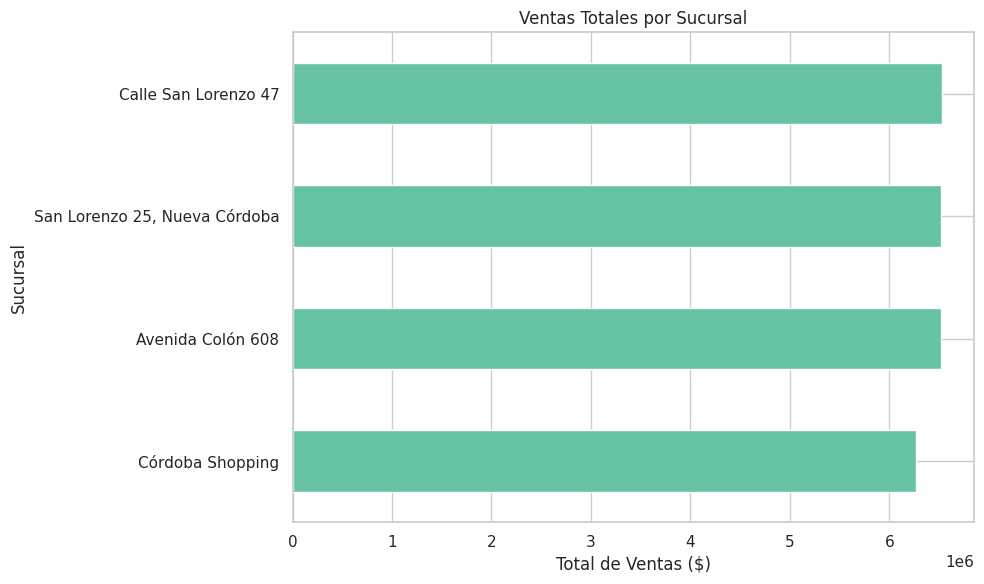

In [19]:
ventas_por_sucursal = starbuck.groupby("Sucursal")["Total_Venta"].sum().sort_values(ascending=False)

plt.figure()
ventas_por_sucursal.plot(kind="barh", color="#66C2A5")
plt.title("Ventas Totales por Sucursal")
plt.xlabel("Total de Ventas ($)")
plt.ylabel("Sucursal")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**2.- VENTAS POR PRODUCTOS**

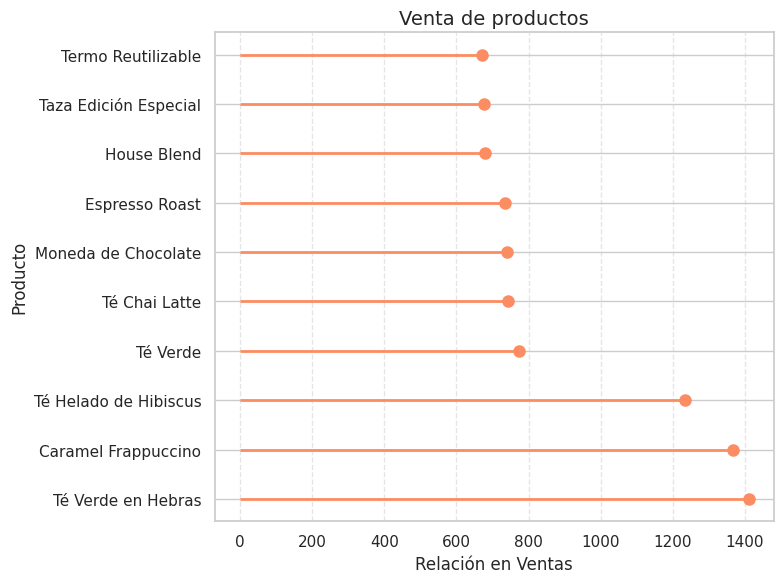

In [20]:
ventas_por_producto = starbuck.groupby("Nombre_Producto")["Cantidad"].sum().sort_values(ascending=False).head(10)
productos = ventas_por_producto.index
cantidades = ventas_por_producto.values

plt.figure(figsize=(8,6))
plt.hlines(y=productos, xmin=0, xmax=cantidades, color="#FC8D62", linewidth=2)
plt.plot(cantidades, productos, "o", color="#FC8D62", markersize=8)

plt.title("Venta de productos", fontsize=14)
plt.xlabel("Relación en Ventas")
plt.ylabel("Producto")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**3.- MÉTODO DE PAGO MAS UTILIZADO**

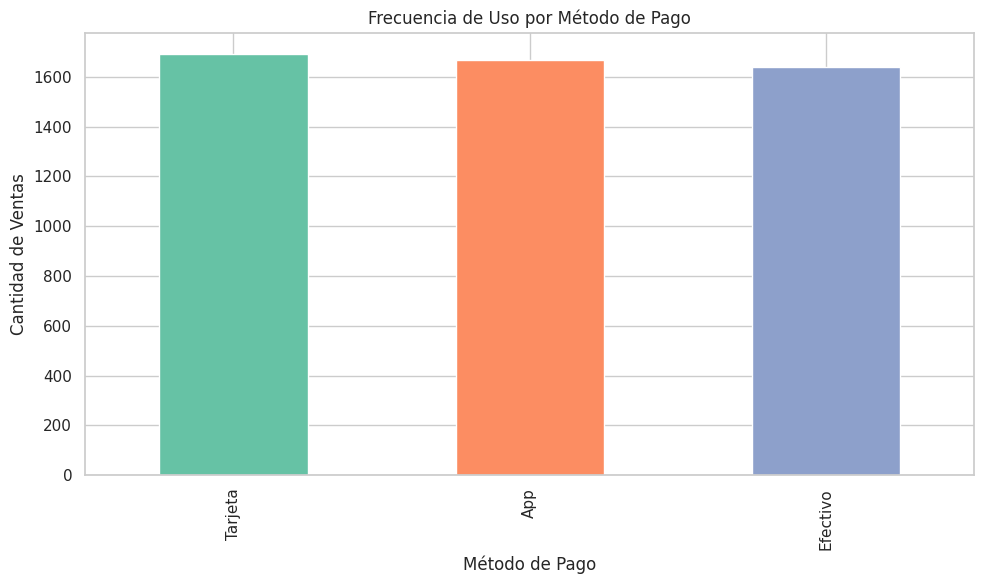

In [21]:
#colores = ["#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3"]
metodo_pago_uso = starbuck["Método_de_Pago"].value_counts()

plt.figure()
metodo_pago_uso.plot(kind="bar", color=["#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3"])
plt.title("Frecuencia de Uso por Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Ventas")
plt.tight_layout()
plt.show()

**4.- ¿CUÁL TURNO OBTIENE MAS VENTAS?**

In [22]:
ventas_por_turno = starbuck.groupby("Turno")["Total_Venta"].sum().reset_index()
ventas_por_turno = ventas_por_turno.sort_values(by="Total_Venta", ascending=False)

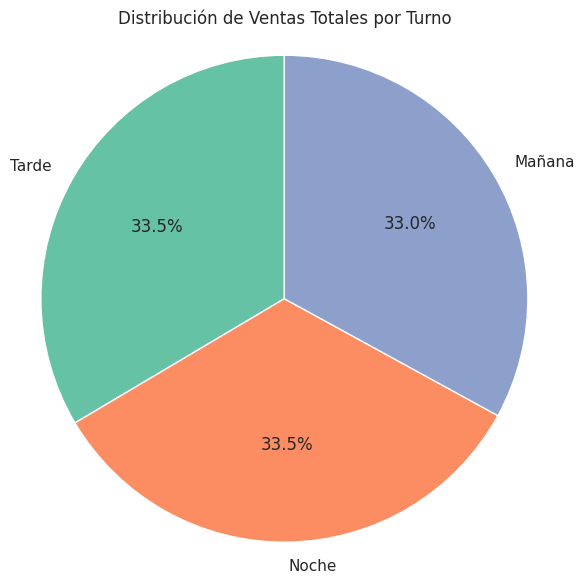

In [23]:
colors = sns.color_palette("Set2")[0:len(ventas_por_turno)]

plt.figure(figsize=(6, 6))
plt.pie(
    ventas_por_turno["Total_Venta"],
    labels=ventas_por_turno["Turno"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors
)
plt.title("Distribución de Ventas Totales por Turno")
plt.axis("equal")
plt.tight_layout()
plt.show()

**5.- PORTECENTAJE DE CLIENTES MIEMBROS Y NO MIEMBROS DE LA COMUNIDAD**

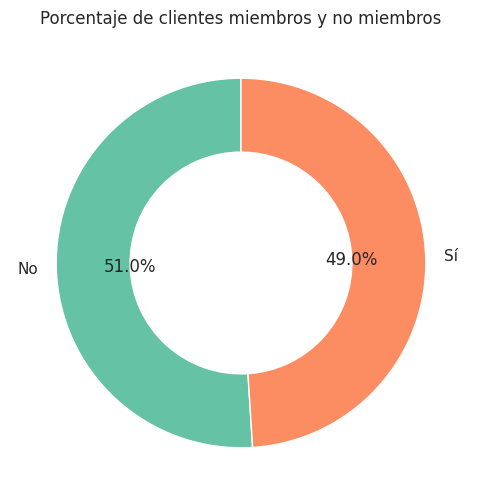

In [24]:
valores = starbuck['Cliente_Miembro'].value_counts(normalize=True) * 100
labels = valores.index
sizes = valores.values
colors = ["#66C2A5", "#FC8D62"]

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

plt.title('Porcentaje de clientes miembros y no miembros')
plt.show()

**6.- CONOCER EN QUE TURNO PUEDE HABER MAS DEMORAS CON LAS ENTREGAS DE PEDIDOS**

/tmp/ipython-input-25-2395344518.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Turno_demora, x='Turno', y='Demora_Preparación_Min', palette="muted")


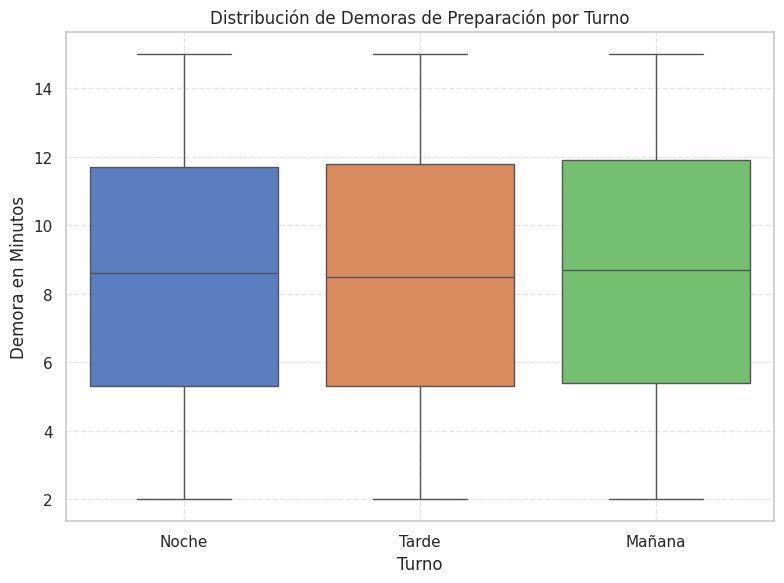

In [25]:
Turno_demora = starbuck[['Turno', 'Demora_Preparación_Min']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Turno_demora, x='Turno', y='Demora_Preparación_Min', palette="muted")

plt.title("Distribución de Demoras de Preparación por Turno")
plt.xlabel("Turno")
plt.ylabel("Demora en Minutos")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()


# CONCLUSION


Luego de analizar el dataset para responder las interrogantes iniciales, se puede determinar que:


*   La sucursal con mayor volumen de ventas es la ubicada en Calle San Lorenzo 47.
*   Los tres productos más vendidos son el té helado de Hibiscus, el Caramel Frappuccino y el té verde en hebras.
*   Los clientes prefieren pagar con tarjeta para sus consumos.
*   Todas las franjas horarias presentan buenas ventas, aunque por la tarde y la noche se observa un ligero aumento en comparación con la mañana.
*   Del 100% de los clientes evaluados, solo el 49% son miembros de la comunidad.
*   Finalmente, los pedidos demoran entre 5 y 11 minutos en ser entregados. No se identifican demoras significativas entre los distintos turnos, aunque durante las mañanas el tiempo de entrega puede incrementarse ligeramente, manteniéndose dentro de ese rango.

Estos hallazgos ofrecen información valiosa para optimizar la gestión comercial y mejorar la experiencia del cliente.